In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from tqdm import tqdm, trange
import seaborn as sns
import random

In [2]:
class CFG:
    height = 6
    width = 9
    start = [2, 0]
    goal  = [0, 8]
    action_Up = [-1, 0]
    action_Down = [1, 0]
    action_Left = [0, -1]
    action_Right = [0, 1]
    actions = [action_Up, action_Down, action_Left, action_Right]
    alpha = 0.1
    epsilon = 0.1
    episode = 50
    n_run = 30
    n_plans = [0, 5, 50]
    garma = 0.95

In [3]:
otc = [(1, 2), (2, 2), (3, 2), (4, 5), (0, 7), (1, 7), (2, 7)]

def go(curX, curY, action):
    [tmpX, tmpY] = CFG.actions[action]
    nextX = max(0, min(curX + tmpX, CFG.height - 1))
    nextY = max(0, min(curY + tmpY, CFG.width - 1))
    if ((nextX, nextY) in otc):
        (nextX, nextY) = (curX, curY)
    return (nextX, nextY)

def step(curX, curY, action):
    (nextX, nextY) = go(curX, curY, action)
    if ([nextX, nextY] == CFG.goal):
        return ([nextX, nextY], 1, True)
#     if ([nextX, nextY] == [curX, curY]):
#         return([nextX, nextY], -1, False)
    return ([nextX, nextY], 0, False)

In [4]:
def dyna_Q(n_plan, n_run = CFG.n_run, episode = CFG.episode):
    res = np.zeros((episode))
    for r in trange(n_run):
        Q = np.random.random((CFG.height, CFG.width, 4))
        model = {}
        tmp = []
        for ep in range(episode):
            time = 0
            [curX, curY] = CFG.start
            while(True):
                if (np.random.random()<CFG.epsilon):
                    action = np.random.choice(np.arange(4))
                else:
                    action = np.argmax(Q[curX, curY, :])
                (Nstate, reward, done) = step(curX, curY, action)
                [nextX, nextY] = Nstate
#                 print(ep, (curX, curY), action, (nextX, nextY))
                Q[curX, curY, action] += CFG.alpha * (reward + CFG.garma * np.max(Q[nextX, nextY, :]) - Q[curX, curY, action])
                model[((curX, curY), action)] = ((nextX, nextY), reward)

                for _ in range(n_plan):
                    idx = np.random.choice(range(len(model.keys())))
                    ((tmpX, tmpY), tmp_action) = list(model.keys())[idx]
                    ((tmp_NX, tmp_NY), tmp_reward) = model[((tmpX, tmpY), tmp_action)]
                    Q[tmpX, tmpY, tmp_action] += CFG.alpha * (tmp_reward + CFG.garma * np.max(Q[tmp_NX, tmp_NY, :]) - Q[tmpX, tmpY, tmp_action])

                time += 1
                if (done):
                    tmp.append(time)
                    break
                (curX, curY) = (nextX, nextY)
#                 print(Q)
            
        res += tmp
    return res/n_run

100%|██████████| 30/30 [02:48<00:00,  5.63s/it]


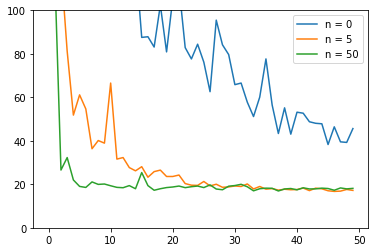

In [5]:
for n_plan in CFG.n_plans:
    plt.plot(dyna_Q(n_plan), label = f'n = {n_plan}')
plt.legend()
plt.ylim([0, 100])
plt.show()